In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Task 0
Read the dataset from csv file & perform data cleaning - remove all rows, which contains `?` in some columns.
Also check for data correctness (salary & salary $K).

In [3]:
df = pd.read_csv("../data/adult.csv", index_col="Unnamed: 0")
df = df[~df.eq("?").any(axis=1)]

mask_above_50 = df[(df['salary'] == '>50K') & (df['salary K$'] <= 50)]
mask_below_50 = df[(df['salary'] == '<=50K') & (df['salary K$'] > 50)]
incorrect_salary = mask_above_50.any() | mask_below_50.any()
if incorrect_salary.any():
    print("Salary $K not in correct range")
else:
    print("Salary $K is in correct range")

Salary $K is in correct range


# Task 1
Print the count of men and women in the dataset.

In [4]:
count_men = (df["sex"] == "Male").sum()
count_women = (df["sex"] == "Female").sum()
print("Count of men:", count_men)
print("Count of women:", count_women)

Count of men: 20380
Count of women: 9782


# Task 2
Find the average age of men in dataset

In [5]:
average_age_men = round(df.loc[df["sex"] == "Male", "age"].mean(), 2)
print("Average age of men:", average_age_men)

Average age of men: 39.18


# Task 3
Get the percentage of people from Poland (native-country)

In [6]:
percentage_from_poland = (df["native-country"] == "Poland").sum() / len(df) * 100
print(f"Percentage of people from Poland: {round(percentage_from_poland, 2)}%")

Percentage of people from Poland: 0.19%


# Task 4
Get the mean and standard deviation of the age for people who earn > 50K per year. After this, get it for those who earn <= 50K.

In [7]:
age_salary_above_50 = df.loc[df["salary"] == ">50K", "age"]
age_salary_below_50 = df.loc[df["salary"] == "<=50K", "age"]
print(f"For people who earn > 50K per year: \nmean age is {round(age_salary_above_50.mean(), 2)}\nstandard deviation for age is {round(age_salary_above_50.std(), 2)}\n")

print(f"For people who earn <= 50K per year: \nmean age is {round(age_salary_below_50.mean(), 2)}\nstandard deviation for age is {round(age_salary_below_50.std(), 2)}")


For people who earn > 50K per year: 
mean age is 43.96
standard deviation for age is 10.27

For people who earn <= 50K per year: 
mean age is 36.61
standard deviation for age is 13.46


# Task 5
Check, if there are some people without higher education (education: Bachelors, Prof-school, Assoc-acdm, Assoc-voc, Masters, Doctorate), but with > 50K salary

In [8]:
selected_rows = df[(~df["education"].isin(["Bachelors", "Prof-school", "Assoc-acdm", "Assoc-voc", "Masters", "Doctorate"])) & (df["salary"] == ">50K")]
print("Amount of people without higher education, but with salary > 50K:", len(selected_rows))

Amount of people without higher education, but with salary > 50K: 3178


# Task 6
Get the statistics of age for each type of education. Use `groupby` and `describe` for this.

In [9]:
df.groupby("education")["age"].describe()

,count,mean,std,min,25%,50%,75%,max
education,,,,,,,,
10th,820.0,37.897561,16.225795,17.0,23.0,36.0,52.0,90.0
11th,1048.0,32.363550,15.089307,17.0,18.0,28.5,43.0,90.0
12th,377.0,32.013263,14.373710,17.0,19.0,28.0,41.0,79.0
1st-4th,151.0,44.622517,14.929051,19.0,33.0,44.0,56.0,81.0
5th-6th,288.0,41.649306,14.754622,17.0,28.0,41.0,53.0,82.0
7th-8th,557.0,47.631957,15.737479,17.0,34.0,49.0,60.0,90.0
9th,455.0,40.303297,15.335754,17.0,28.0,38.0,53.0,90.0
Assoc-acdm,1008.0,37.286706,10.509755,19.0,29.0,36.0,44.0,90.0
Assoc-voc,1307.0,38.246366,11.181253,19.0,30.0,37.0,45.0,84.0


# Task 7
Compare the married and non-married men salaries. Who earns more? (>50K or <=50K)
Married men are those, whom `marital-status` starts with "Married". Others are not.

In [10]:
married = df[(df["sex"] == "Male") & (df["marital-status"].str.startswith("Married"))]
married_above_50 = married[married["salary"] == ">50K"]
percentage_married_above_50k = (len(married_above_50) / len(married)) * 100


non_married = df[(df["sex"] == "Male") & (~df["marital-status"].str.startswith("Married"))]
nonmarried_above_50 = non_married[non_married["salary"] == ">50K"]
percentage_nonmarried_above_50k = (len(nonmarried_above_50) / len(non_married)) * 100

print(f"Percentage of married people with salary >50K: {round(percentage_married_above_50k, 2)}%")
print(f"Percentage of non-married people with salary >50K: {round(percentage_nonmarried_above_50k, 2)}%")

Percentage of married people with salary >50K: 44.8%
Percentage of non-married people with salary >50K: 8.85%


# Task 8
Get the max hours per week some person works. How many people works the same amount of hours per week?

In [11]:
max_hours_per_week = df["hours-per-week"].max()
count_same_hours = len(df[df["hours-per-week"] == max_hours_per_week])
print("Max hours per week: ", max_hours_per_week)
print(f"Number of people working {max_hours_per_week} hours per week: ", count_same_hours)


Max hours per week:  99
Number of people working 99 hours per week:  78


# Task 9
Analyze the correlation between data in dataset. Understand connected fields in it and print highlight thier connection.

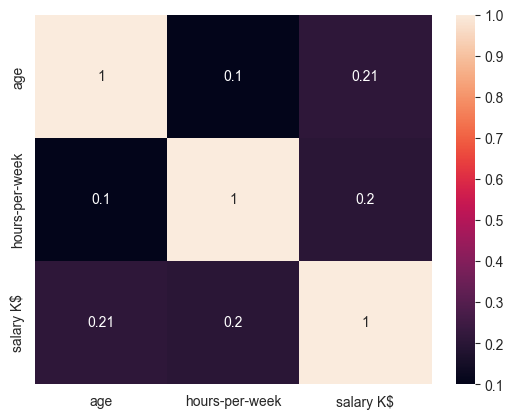

In [12]:
matrix = df.corr().round(2)
sns.heatmap(matrix, annot=True)
plt.show()
